In [21]:
import seaborn as sns

from tqdm import tqdm
from rdkit import Chem
from pdbbind_metadata_processor import PDBBindMetadataProcessor

In [2]:
pp = PDBBindMetadataProcessor()

In [5]:
pdb_ids = pp.available_structures

In [6]:
table = pp.get_master_dataframe()
mers_pdb_ids = [pdb_id 
                for pdb_id in pdb_ids 
                if pdb_id not in table['PDB code'].values]

In [18]:
ligand_format = 'mol2'
mols = []
for pdb_id in tqdm(mers_pdb_ids) :
    protein_path, ligand_pathes = pp.get_pdb_id_pathes(pdb_id=pdb_id,
                                                         ligand_format=ligand_format)
    ligand_path = ligand_pathes[0]
    try :
        mol = Chem.rdmolfiles.MolFromMol2File(ligand_path)
        if mol is not None :
            rdmol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
            if rdmol is not None : #rdkit parsable
                mol.GetConformer().SetProp('PDB_ID', pdb_id)
                mol.GetConformer().SetProp('pdbbind_id', pdb_id)
                mols.append(mol)
            else :
                print(f'{pdb_id} Not RDKit parsable')
    except Exception as e:
        print('Impossible to read mol2 file for ' + pdb_id)
        print(str(e))

  0%|                                                                       | 0/2600 [00:00<?, ?it/s][16:59:18] 1j4q_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:18] 3k0k_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:18] 3nkx_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:18] 3s8o_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
  2%|█▏                                                           | 51/2600 [00:00<00:05, 508.08it/s][16:59:18] 3al3_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:18] 6g8k_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:18] 1a1c_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:18] 6fbw_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:18] 3fea_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:18] 4e9c_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:18] 6p7p_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:18] 3poa_l

Impossible to read mol2 file for readme
Bad input file /home/benoit/PDBBind/PDBbind_v2020_other_PL/v2020-other-PL/readme/readme_ligand.mol2


[16:59:21] 5lu2_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:21] 3l6f_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
 73%|███████████████████████████████████████████▎               | 1906/2600 [00:03<00:01, 549.45it/s][16:59:21] 6df1_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:21] 4ym4_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:21] 3dpc_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:21] 4jg0_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:21] 2jql_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:21] 2ci9_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:21] 4gvc_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:21] 5k6s_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:21] 4rh5_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:21] 3iqv_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:59:21] 5dms_ligand: warning - O.co2 with no

In [20]:
nha = [mol.GetNumHeavyAtoms() for mol in mols]

<AxesSubplot:ylabel='Count'>

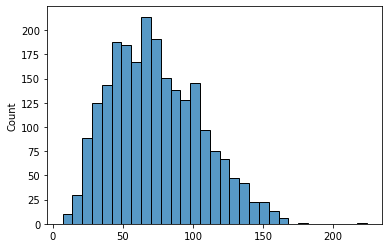

In [22]:
sns.histplot(nha)